In [2]:
import json
import pandas as pd

# Open the JSON file
with open('steam_reviews/10/416F4A342B2B663375766F43633454673667493D.json', encoding='utf-8-sig') as f:
    data = json.load(f)

# Access the data
# print(data)

pretty_json = json.dumps(data, indent=4)
# pretty_json = json.dumps(data)
# Print the pretty-printed JSON string
# some_dict = dict(pretty_json)
print(data.keys())
print(pretty_json)
# print(type(data))


dict_keys(['success', 'query_summary', 'reviews', 'cursor'])
{
    "success": 1,
    "query_summary": {
        "num_reviews": 100
    },
    "reviews": [
        {
            "recommendationid": "95177398",
            "author": {
                "steamid": "76561198089309814",
                "num_games_owned": 3,
                "num_reviews": 1,
                "playtime_forever": 524312,
                "playtime_last_two_weeks": 0,
                "playtime_at_review": 496885,
                "last_played": 1640099962
            },
            "language": "portuguese",
            "review": "Top",
            "timestamp_created": 1625575865,
            "timestamp_updated": 1625575865,
            "voted_up": true,
            "votes_up": 0,
            "votes_funny": 0,
            "weighted_vote_score": 0,
            "comment_count": 0,
            "steam_purchase": true,
            "received_for_free": false,
            "written_during_early_access": false
        },
    

In [48]:
print(type(data['reviews']))
print(len(data['reviews']))
# print(data['reviews'])
print(type(data['reviews'][0]))
print(len(data['reviews'][0]))
print(data['reviews'][0].keys())

<class 'list'>
100
<class 'dict'>
14
dict_keys(['recommendationid', 'author', 'language', 'review', 'timestamp_created', 'timestamp_updated', 'voted_up', 'votes_up', 'votes_funny', 'weighted_vote_score', 'comment_count', 'steam_purchase', 'received_for_free', 'written_during_early_access'])


In [5]:
df = pd.DataFrame(data['reviews'][0])
df.head(50)

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
last_played,95177398,1640099962,portuguese,Top,1625575865,1625575865,True,0,0,0,0,True,False,False
num_games_owned,95177398,3,portuguese,Top,1625575865,1625575865,True,0,0,0,0,True,False,False
num_reviews,95177398,1,portuguese,Top,1625575865,1625575865,True,0,0,0,0,True,False,False
playtime_at_review,95177398,496885,portuguese,Top,1625575865,1625575865,True,0,0,0,0,True,False,False
playtime_forever,95177398,524312,portuguese,Top,1625575865,1625575865,True,0,0,0,0,True,False,False
playtime_last_two_weeks,95177398,0,portuguese,Top,1625575865,1625575865,True,0,0,0,0,True,False,False
steamid,95177398,76561198089309814,portuguese,Top,1625575865,1625575865,True,0,0,0,0,True,False,False


In [54]:
rev_dict = data['reviews'][0]
auth_dict = rev_dict.pop('author',None)

print(rev_dict)
# print(rev_dict['recommendationid'])
rev_df = pd.DataFrame({k: [v] for k, v in rev_dict.items()})
auth_df = pd.DataFrame({k: [v] for k, v in auth_dict.items()})

print(rev_df.head(5))
print(auth_df.head(5))

{'recommendationid': '95177398', 'language': 'portuguese', 'review': 'Top', 'timestamp_created': 1625575865, 'timestamp_updated': 1625575865, 'voted_up': True, 'votes_up': 0, 'votes_funny': 0, 'weighted_vote_score': 0, 'comment_count': 0, 'steam_purchase': True, 'received_for_free': False, 'written_during_early_access': False}
  recommendationid    language review  timestamp_created  timestamp_updated  \
0         95177398  portuguese    Top         1625575865         1625575865   

   voted_up  votes_up  votes_funny  weighted_vote_score  comment_count  \
0      True         0            0                    0              0   

   steam_purchase  received_for_free  written_during_early_access  
0            True              False                        False  
             steamid  num_games_owned  num_reviews  playtime_forever  \
0  76561198089309814                3            1            524312   

   playtime_last_two_weeks  playtime_at_review  last_played  
0                   

In [55]:
rev_df.head(5)

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,95177398,portuguese,Top,1625575865,1625575865,True,0,0,0,0,True,False,False


In [56]:
auth_df.head(5)

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,76561198089309814,3,1,524312,0,496885,1640099962


In [58]:
auth_df = pd.concat([rev_df['recommendationid'], auth_df], axis=1)
auth_df.head(5)

,recommendationid,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,95177398,76561198089309814,3,1,524312,0,496885,1640099962


In [65]:
rev_df.keys()

Index(['recommendationid', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'voted_up', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'steam_purchase',
       'received_for_free', 'written_during_early_access'],
      dtype='object')

In [24]:
import datetime

# Define the timestamp
timestamp = 1625574116

# Convert the timestamp to a datetime object
datetime_object = datetime.datetime.fromtimestamp(timestamp)

# Print the date and time in a human-readable format
print("Date:", datetime_object.date())
print("Time:", datetime_object.time())


Date: 2021-07-06
Time: 08:21:56


In [31]:
import os

# Define the directory path
path = 'steam_reviews/'

# Initialize lists for folders and files
folders = []
files = []

# Loop over each item in the directory
for item in os.listdir(path):
    # Get the full path of the item
    item_path = os.path.join(path, item)
    # Check if the item is a folder
    if os.path.isdir(item_path):
        folders.append(item)
    # Otherwise, it must be a file
    else:
        files.append(item)

# Print the results
per_folder = path + folders[0]
print(per_folder)

for item in os.listdir(per_folder):
    # Get the full path of the item
    item_path = os.path.join(path, item)
    # Check if the item is a folder
    if os.path.isdir(item_path):
        folders.append(item)
    # Otherwise, it must be a file
    else:
        files.append(item)

# print(os.listdir(path))
# print("Folders:", folders)
# print("Folders Count:", len(folders))
print("Files:", files)
print("Files Count:", len(files))

steam_reviews/10
Files: ['416F4A342B2B663375766F43633454673667493D.json', '416F4A342B347130337573436634714E7A41453D.json', '416F4A342B354B706F66634366626E767851493D.json', '416F4A342B3565752B766B43654E44573541493D.json', '416F4A342B37696379753443665954313277453D.json', '416F4A342B392B626D744D4365616D6D55673D3D.json', '416F4A342B4C4C47764F5543667353767151453D.json', '416F4A342B4C533874734D4365756A7049413D3D.json', '416F4A342B4D7A763065734366354B797867453D.json', '416F4A342B5A2B4973386B43662F47384D413D3D.json', '416F4A342B617964714F4543664F58586C77453D.json', '416F4A342B62484871753443653543503251453D.json', '416F4A342B6337632B504543655A2B6D6867493D.json', '416F4A342B634731302B734364592F487877453D.json', '416F4A342B634839673951436366656F56513D3D.json', '416F4A342B6454656A4E304364654F4F66773D3D.json', '416F4A342B6569667A653443654A65643341453D.json', '416F4A342B663245702B3843633954733577453D.json', '416F4A342B73334E7573554364506A4F4A513D3D.json', '416F4A342B75373873743043655A4C486741453D.js

In [67]:
import json

path_10 = 'steam_reviews/10/'
rev_full_df = pd.DataFrame({'recommendationid': [], 'language': [], 'review': [], 'timestamp_created': [],
       'timestamp_updated': [], 'voted_up': [], 'votes_up': [], 'votes_funny': [],
       'weighted_vote_score': [], 'comment_count': [], 'steam_purchase': [],
       'received_for_free': [], 'written_during_early_access': []})
auth_full_df = pd.DataFrame({'recommendationid': [], 'steamid': [], 'num_games_owned': [], 'num_reviews': [],
       'playtime_forever': [], 'playtime_last_two_weeks': [], 'playtime_at_review': [],
       'last_played': []})
for file in files:
    json_path = path_10 + file
    # Open the JSON file
    with open(json_path, encoding='utf-8-sig') as f:
        data = json.load(f)
    for review in data['reviews']:
        # split reviews
        rev_dict = review
        auth_dict = rev_dict.pop('author',None)
        # Fix dataframe
        rev_df = pd.DataFrame({k: [v] for k, v in rev_dict.items()})
        auth_df = pd.DataFrame({k: [v] for k, v in auth_dict.items()})
        # add recomendationid to auth        
        auth_df = pd.concat([rev_df['recommendationid'], auth_df], axis=1)
        
        #add to full df
        rev_full_df = pd.concat([rev_full_df, rev_df], ignore_index=True)
        auth_full_df = pd.concat([auth_full_df, auth_df], ignore_index=True)


C:\Users\tbont\AppData\Local\Temp\ipykernel_36736\4257793599.py:27: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  rev_full_df = pd.concat([rev_full_df, rev_df], ignore_index=True)


In [68]:
rev_full_df.head(10)

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,95177398,portuguese,Top,1.625576e+09,1.625576e+09,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,95176054,turkish,harika,1.625574e+09,1.625574e+09,True,0.0,0.0,0.0,0.0,True,False,False
2,95175928,russian,"кс 1.6 как всегда шедевральна , более 2к+ часо...",1.625574e+09,1.625574e+09,True,0.0,0.0,0.0,0.0,True,False,False
3,95175726,spanish,que buen juego de fulbo,1.625574e+09,1.625574e+09,True,0.0,0.0,0.0,0.0,True,False,False
4,95174780,russian,"Хорошая игра, всем советую",1.625573e+09,1.625573e+09,True,0.0,0.0,0.0,0.0,True,False,False
5,95173901,portuguese,Jogo muy Foda,1.625572e+09,1.625572e+09,True,0.0,1.0,0.0,0.0,True,False,False
6,95173862,russian,Бессмертная классика!,1.625572e+09,1.638096e+09,True,0.0,0.0,0.0,0.0,True,False,False
7,95173286,russian,Свой путь в Counter Strike я начал ещё с 2012...,1.625571e+09,1.625571e+09,True,0.0,0.0,0.0,0.0,True,False,False
8,95172291,turkish,nostaji için alınır,1.625570e+09,1.625570e+09,True,0.0,0.0,0.0,0.0,True,True,False
9,95171501,english,nice game,1.625569e+09,1.625569e+09,True,1.0,0.0,0.523809552192687988,0.0,True,False,False


In [69]:
auth_full_df.head(10)

,recommendationid,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,95177398,76561198089309814,3.0,1.0,524312.0,0.0,496885.0,1.640100e+09
1,95176054,76561199064079959,20.0,11.0,1296.0,0.0,224.0,1.656969e+09
2,95175928,76561198281778928,45.0,6.0,780.0,0.0,207.0,1.656247e+09
3,95175726,76561199046178038,19.0,1.0,98146.0,0.0,65288.0,1.658085e+09
4,95174780,76561199169692783,3.0,1.0,17151.0,0.0,6459.0,1.656335e+09
5,95173901,76561199082825147,10.0,2.0,15313.0,0.0,8454.0,1.659297e+09
6,95173862,76561198837696122,31.0,11.0,684.0,0.0,656.0,1.654810e+09
7,95173286,76561199114020783,38.0,6.0,144.0,0.0,100.0,1.625589e+09
8,95172291,76561199103422978,23.0,2.0,8060.0,0.0,2868.0,1.638812e+09
9,95171501,76561199054125498,34.0,4.0,15240.0,5.0,1604.0,1.660561e+09


In [70]:
rev_full_df.to_csv('appid_10_reviews.csv')
auth_full_df.to_csv('appid_10_authors.csv')

In [72]:
print(rev_full_df.shape, auth_full_df.shape)

(122896, 13) (122896, 8)


In [75]:
# Count how many values in column A are equal to each unique value
for val in rev_full_df['language'].unique():
    count_val = rev_full_df['language'].value_counts()[val]
    print(f"There are {count_val} values equal to '{val}' in column language")

There are 1588 values equal to 'portuguese' in column language
There are 8602 values equal to 'turkish' in column language
There are 44043 values equal to 'russian' in column language
There are 12674 values equal to 'spanish' in column language
There are 25411 values equal to 'english' in column language
There are 4971 values equal to 'schinese' in column language
There are 9155 values equal to 'brazilian' in column language
There are 1164 values equal to 'latam' in column language
There are 4822 values equal to 'polish' in column language
There are 1308 values equal to 'hungarian' in column language
There are 236 values equal to 'koreana' in column language
There are 2988 values equal to 'romanian' in column language
There are 402 values equal to 'bulgarian' in column language
There are 1700 values equal to 'czech' in column language
There are 317 values equal to 'tchinese' in column language
There are 109 values equal to 'danish' in column language
There are 872 values equal to 'germ

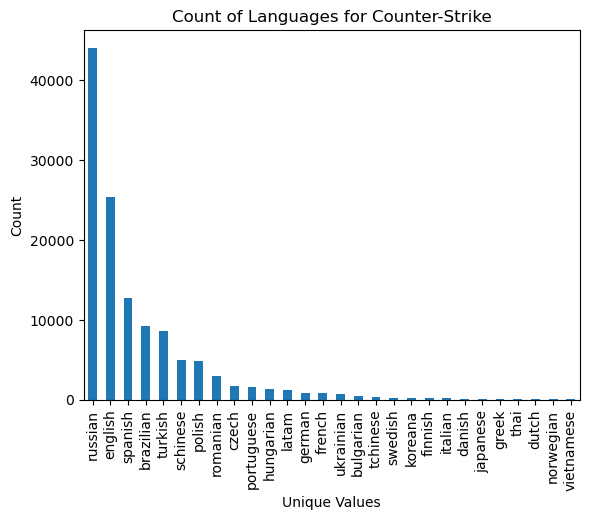

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe
# df = pd.DataFrame({'A': ['x', 'y', 'z', 'x', 'y', 'x']})

# Get the value counts for column A and sort from most to least
count_val = rev_full_df['language'].value_counts().sort_values(ascending=False)

# Plot the counts on a bar graph
count_val.plot(kind='bar')

# Add labels and title
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Count of Languages for Counter-Strike')

# Show the graph
plt.show()

In [ ]:
# No wonder the Rush B meme is ever so prevelant 

In [91]:
! pip install fasttext-langdetect

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 68.8/68.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext-langdetect: filename=fasttext_langdetect-1.0.5-py3-none-any.whl size=7504 sha256=153a49cc2551a83a988a8988ade743f44dbcc4d233af992b207d2cbb5e586cfb
  Stored in directory: c:\users\tbont\appdata\local\pip\cache\wheels\1b\0b\90\a4681c284d9a0da966cb7b6c378836cd3b0c9f23dc9ec7dfc5
  Created wheel for fasttext: filename=fasttext-0.9.2-cp39-cp39-win_amd64.whl size=228356 sha256=82019f1a18bc499e29b53320595b20387b99f99326e872c71c01809b39921a5b
  Stored in directory: c:\users\tbont\appdata\local\pip\cache\wheels\64\57\bc\1741406019061d5664914b070bd3e71f6244648732bc96109e
Successfully built fasttext-langdetect fasttext


In [115]:
import pandas as pd
from langdetect import detect
from ftlangdetect import detect as ftdetect
# Create a dataframe
# rev_full_df

# Define a function to detect the language of a string
def detect_language(text):
    try:
        return detect(text.lower())
    except:
        return 'unknown'

    
# Define a function to detect the language of a string
def ftdetect_language(text):
    try:
        return ftdetect(text=text.lower())
    except:
        return 'unknown'
# Apply the function to the 'review' column to create a new column 'language'
# curious['language'] = rev_full_df['review'].apply(detect_language)

# Print the dataframe
# print(curious)


In [ ]:
print(rev_full_df['review'])

In [116]:
english_reviews = rev_full_df.loc[rev_full_df['language'] == 'english', 'review']
print(english_reviews.head(5))

9                     nice game
10    LEBIH BAGUS DARIPADA CSGO
15                           ;)
47                     Qgreat c
52           Classic of classic
Name: review, dtype: object


In [117]:
print(english_reviews.size)

25411


In [118]:
print(type(english_reviews))

<class 'pandas.core.series.Series'>


In [119]:
english_reviews['lang language'] = english_reviews.apply(detect_language)
english_reviews['ftlang language'] = english_reviews.apply(ftdetect_language)

In [120]:
print(english_reviews.head(5))

9                     nice game
10    LEBIH BAGUS DARIPADA CSGO
15                           ;)
47                     Qgreat c
52           Classic of classic
Name: review, dtype: object


In [121]:
print(english_reviews['lang language'].head(5))

9          pl
10         id
15    unknown
47         ca
52         en
Name: review, dtype: object


In [122]:
print(english_reviews['ftlang language'].head(5))

9      {'lang': 'en', 'score': 0.9469771981239319}
10     {'lang': 'ms', 'score': 0.9777805805206299}
15    {'lang': 'el', 'score': 0.35955289006233215}
47     {'lang': 'en', 'score': 0.4830079972743988}
52     {'lang': 'en', 'score': 0.6812577843666077}
Name: review, dtype: object
